In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import sys
import os
import mdtraj as md

# Add the project root
sys.path.append(os.path.abspath('../../'))

from src.useful_functions import *
from src.openmm.initial_trajectory_module import generate_initial_trajectory

# For reproducibility
np.random.seed(0)

# For matplotlib
font = {'size'   : 10}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

# Read directory paths
read_dirs_paths('dir_paths.txt', globals())
check_directories(out_trajectories1 ,out_trajectories2 ,out_trajectories3 ,out_trajectories4)

Created variables:
inp_dir = input/
out_trajectories1 = output/trajectories/
out_trajectories2 = output/trajectories/openmm_files/
out_trajectories3 = output/trajectories/openmm_files/initial_states/
out_trajectories4 = output/trajectories/openmm_files/final_states/
out_trajectories5 = output/trajectories/openmm_files/final_states2/
out_isokann = output/isokann/
out_mokito = output/mokito/
output/trajectories/ already exists!
output/trajectories/openmm_files/ already exists!
output/trajectories/openmm_files/initial_states/ already exists!
output/trajectories/openmm_files/final_states/ already exists!
 
 


# Initial trajectory

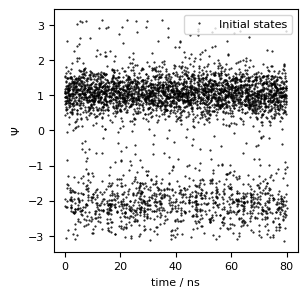

In [4]:
pdbfile_solute = 'pdbfile_solute.pdb'
pdbfile_water = 'pdbfile_water.pdb'

file_traj_water  = "trajectory_water.dcd"
file_traj_solute = "trajectory_solute.dcd"

traj     = md.load(out_trajectories2  + file_traj_solute, top = inp_dir + pdbfile_solute)
dihedral = np.squeeze(md.compute_dihedrals(traj, [[5,1,8,10]], periodic=True))

t = np.linspace(0,80,traj.n_frames)


font = {'size'   : 8}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

fig, ax = plt.subplots(1,1,figsize=(8*in2cm, 8*in2cm))

ax.plot(t, dihedral, 'k.', markersize= 1, alpha=1,  label='Initial states')

ax.set_xlabel(r'time / ns')
ax.set_ylabel(r'$\Psi$')
ax.legend()

fig.savefig("output/figures/initial_states.png", format='png', dpi=300, bbox_inches='tight')

np.savetxt(out_trajectories1 + 'R0.txt', dihedral)

# Short trajectories

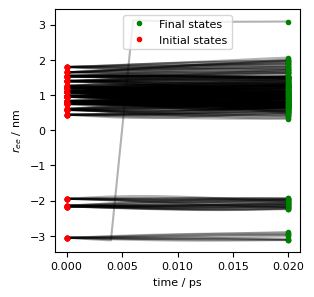

In [6]:
t = np.linspace(0,0.02,11)

M          = 10

font = {'size'   : 8}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches


fig, ax = plt.subplots(1,1,figsize=(8*in2cm, 8*in2cm))

#plt.plot(np.zeros(4000), R, 'k.', markersize= 1, alpha=1)

for i in np.arange(0,30,1):
    for r in range(M):
        file_traj_solute = 'final_states/xt_' + str(i) + '_r' + str(r) + '.dcd'
        traj      = md.load(out_trajectories2 + file_traj_solute, top = inp_dir + pdbfile_solute)   
        Nframes   = traj.n_frames 
        df        = np.squeeze(md.compute_dihedrals(traj, [[5,1,8,10]], periodic=True))
        ax.plot(t, np.insert( df, 0, dihedral[i]), 'k-',  markersize= 1, alpha=0.3)
        ax.plot(0, dihedral[i],'r.')
        ax.plot(0.02, df[-1],'g.')
        ax.plot()


ax.plot(0.02, df[-1], 'g.',  label='Final states')
ax.plot(0, dihedral[i],'r.', label='Initial states')

ax.set_xlabel(r'time / ps')
ax.set_ylabel(r'$r_{ee}$ / nm')
ax.legend(loc='upper center')

fig.savefig("output/figures/short_trajs.png", format='png', dpi=300, bbox_inches='tight')